# Programacion Dinamica Grafos



In [1]:
class abstract_graph:
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges} | {v for u,v in self.edges}
    
    def adjacency_list(self):
        pass
    
class weighted_graph(abstract_graph):
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges.keys()} | {v for u,v in self.edges.keys()}    
    
    def adjacency_list(self):
        adjacent=lambda n : {v:self.edges[(u,v)] for u,v in self.edges.keys() if u==n }
        return {v:adjacent(v) for v in self.nodes}

In [2]:
import heapq
import numpy as np

def dijkstra(G,start):
    if start not in G.nodes:
        return None
    neighbors=G.adjacency_list()
    path={}    
    path.update({start:None})
    distance={}
    distance.update({start:0})
    frontier=[]
    heapq.heappush(frontier,(0,start))
    while frontier:
        dist_u,u=heapq.heappop(frontier)
        for v in neighbors[u]:
            dist_v=dist_u+G.edges[(u,v)]
            if v not in distance.keys() or dist_v<distance[v]:
                path.update({v:u})
                distance.update({v:dist_v})
                heapq.heappush(frontier,(dist_v,v))
    return path,distance

def bellman_ford(G,start):
    if start not in G.nodes:
        return None
    neighbors=G.adjacency_list()
    path={}    
    path.update({start:None})
    distance={v:float('inf') for v in G.nodes}
    distance.update({start:0})
    for i in range(len(G.nodes)-1):
        for (u,v) in G.edges.keys():
            dist_v=distance[u]+G.edges[(u,v)]
            if dist_v<distance[v]:
                path.update({v:u})
                distance.update({v:dist_v})
    return path,distance

def shortest_path(parent,end):
    path=[end]
    k=end
    while k is not None:
        path.append(parent[k])
        k=parent[k]
    return path[:-1][::-1]

In [6]:
# Ejemplo de "Grokking algorithms". A. Bhargava. p. 131

E={('start','a'):6,('start','b'):2,('b','a'):3,('a','fin'):1,
   ('b','fin'):5}

G=weighted_graph(E)

path,dist=bellman_ford(G,'start')
print('Distancias mas cortas BF:', dist)

single_source_all_paths={}
for v in G.nodes:
    single_source_all_paths.update({v:shortest_path(path,v)})
print('Rutas : ',single_source_all_paths)

Distancias mas cortas BF: {'start': 0, 'fin': 6, 'a': 5, 'b': 2}
Rutas :  {'start': ['start'], 'fin': ['start', 'b', 'a', 'fin'], 'a': ['start', 'b', 'a'], 'b': ['start', 'b']}


In [7]:
path,dist=dijkstra(G,'start')
print('Distancias mas cortas Dijsktra:', dist)

single_source_all_paths={}
for v in G.nodes:
    single_source_all_paths.update({v:shortest_path(path,v)})
print('Rutas : ',single_source_all_paths)

Distancias mas cortas Dijsktra: {'start': 0, 'a': 5, 'b': 2, 'fin': 6}
Rutas :  {'start': ['start'], 'fin': ['start', 'b', 'a', 'fin'], 'a': ['start', 'b', 'a'], 'b': ['start', 'b']}


{'start': ['start'], 'a': ['start', 'b', 'a'], 'b': ['start', 'b'], 'fin': ['start', 'b', 'a', 'fin']}


/home/sergio/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/sergio/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


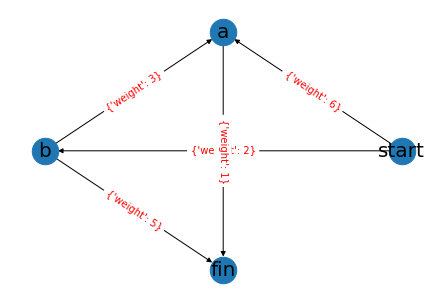

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.DiGraph()

E_nx=[(e[0],e[1],k) for e,k in E.items()]
G.add_weighted_edges_from(E_nx)
pos=nx.circular_layout(G)
#pos = nx.spring_layout(G)
print(nx.single_source_dijkstra_path(G,source='start'))

nx.draw(G,pos, node_size=700)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
nx.draw_networkx_edge_labels(G,pos,font_color='red')
plt.show()

In [15]:
# Ejemplo de "Discrete Mathematics and its Applications". K.H. Rosen 7th Edition. p 713 

E={('a','b'):4,('b','a'):4,('b','d'):5,('d','b'):5,
   ('a','c'):2,('c','a'):2,('c','b'):1,('b','c'):1,
   ('c','d'):8,('d','c'):8,('e','c'):10,('c','e'):10,
   ('d','e'):2,('e','d'):2,('d','z'):6,('z','d'):6,
   ('e','z'):3,('z','e'):3}

G=weighted_graph(E)


start='a'
path,distance=dijkstra(G,start)
print('Distancias Dijkstra: ',distance)
single_source_all_paths={}
for v in G.nodes:
    single_source_all_paths.update({v:shortest_path(path,v)})
print('Rutas : ',single_source_all_paths)

Distancias Dijkstra:  {'a': 0, 'b': 3, 'c': 2, 'd': 8, 'e': 10, 'z': 13}
Rutas :  {'c': ['a', 'c'], 'd': ['a', 'c', 'b', 'd'], 'a': ['a'], 'e': ['a', 'c', 'b', 'd', 'e'], 'b': ['a', 'c', 'b'], 'z': ['a', 'c', 'b', 'd', 'e', 'z']}


In [16]:
path,distance=bellman_ford(G,start)
print('Distancias BF: ',distance)
single_source_all_paths={}
for v in G.nodes:
    single_source_all_paths.update({v:shortest_path(path,v)})
print('Rutas : ',single_source_all_paths)

Distancias BF:  {'c': 2, 'd': 8, 'a': 0, 'e': 10, 'b': 3, 'z': 13}
Rutas :  {'c': ['a', 'c'], 'd': ['a', 'c', 'b', 'd'], 'a': ['a'], 'e': ['a', 'c', 'b', 'd', 'e'], 'b': ['a', 'c', 'b'], 'z': ['a', 'c', 'b', 'd', 'e', 'z']}


{'a': ['a'], 'b': ['a', 'c', 'b'], 'c': ['a', 'c'], 'd': ['a', 'c', 'b', 'd'], 'e': ['a', 'c', 'b', 'd', 'e'], 'z': ['a', 'c', 'b', 'd', 'e', 'z']}


/home/sergio/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/sergio/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


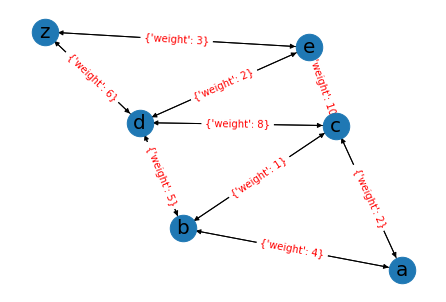

In [17]:
G=nx.DiGraph()

E_nx=[(e[0],e[1],k) for e,k in E.items()]
G.add_weighted_edges_from(E_nx)
pos=nx.spring_layout(G)

print(nx.single_source_dijkstra_path(G,source='a'))

nx.draw(G,pos, node_size=700)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
nx.draw_networkx_edge_labels(G,pos,font_color='red')
plt.show()

In [49]:
random_graph = lambda n,p : {(u,v):np.random.randint(1,10) for u in np.arange(n) for v 
                    in np.arange(n) if np.random.rand()>p and u!=v}
# cantidad de vértices
n=100
# 1- probabilidad de crear aristas
p=0.7

E=random_graph(n,p)

G=weighted_graph(E)
# chequear que el grafo sea conexo y que el vértice inicial exista!
start=0
path,distance=dijkstra(G,start)

In [50]:
G=nx.DiGraph()

E_nx=[(e[0],e[1],w) for e,w in E.items()]
G.add_weighted_edges_from(E_nx)

nx_path=nx.single_source_dijkstra_path(G,source=0)
nx_distance=nx.single_source_dijkstra_path_length(G,0,9)
print(nx_distance)
print(distance)

{0: 0, 62: 1, 88: 1, 68: 2, 92: 2, 96: 2, 1: 2, 9: 2, 41: 2, 45: 2, 59: 2, 87: 2, 23: 2, 55: 2, 69: 2, 79: 2, 11: 3, 44: 3, 77: 3, 85: 3, 40: 3, 74: 3, 5: 3, 14: 3, 25: 3, 36: 3, 42: 3, 52: 3, 2: 3, 61: 3, 67: 3, 86: 3, 81: 3, 94: 3, 95: 3, 13: 3, 60: 3, 70: 3, 31: 3, 65: 3, 72: 3, 24: 3, 27: 3, 28: 3, 64: 3, 30: 3, 10: 3, 18: 4, 38: 4, 76: 4, 8: 4, 58: 4, 12: 4, 89: 4, 63: 4, 97: 4, 16: 4, 22: 4, 7: 4, 46: 4, 49: 4, 32: 4, 33: 4, 6: 4, 21: 4, 54: 4, 29: 4, 47: 4, 98: 4, 20: 4, 35: 4, 91: 4, 50: 4, 93: 4, 78: 4, 83: 4, 51: 4, 15: 4, 66: 4, 82: 4, 75: 4, 19: 4, 80: 4, 84: 4, 53: 4, 56: 4, 90: 4, 39: 5, 57: 5, 37: 5, 71: 5, 17: 5, 48: 5, 34: 5, 43: 5, 73: 5, 4: 5, 26: 5, 3: 6, 99: 6}
{0: 0, 5: 3, 10: 3, 11: 3, 14: 3, 16: 4, 18: 4, 23: 2, 27: 3, 28: 3, 31: 3, 32: 4, 35: 4, 37: 5, 38: 4, 40: 3, 41: 2, 44: 3, 52: 3, 55: 2, 56: 4, 58: 4, 59: 2, 62: 1, 66: 4, 68: 2, 69: 2, 72: 3, 74: 3, 77: 3, 85: 3, 87: 2, 88: 1, 92: 2, 94: 3, 96: 2, 99: 6, 1: 2, 7: 4, 9: 2, 13: 3, 25: 3, 34: 5, 36: 3, 39: 5

/home/sergio/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/sergio/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


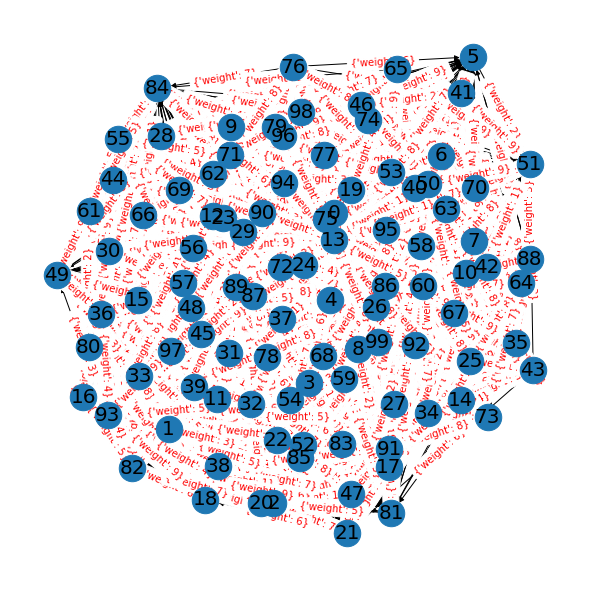

In [51]:
pos=nx.spring_layout(G)
plt.figure(figsize=(8,8))
nx.draw(G,pos, node_size=700)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
nx.draw_networkx_edge_labels(G,pos,font_color='red')
plt.show()

# Tarea

En esta tarea Ud. debe comprobar las siguientes hipótesis:

    1.) La complejidad del algoritmo Dijsktra depende de la cantidad de aristas del grafo.
    2.) El peor caso del algoritmo Bellman-Ford se produce cuando el grafo es denso (gran cantidad de aristas).
    3.) Cuando se requiere calcular las distancias más cortas entre todos los vértices del grafo, independiente de la cantidad de vértices el algoritmo Floyd-Warshall mejora el tiempo de ejecución de la fuerza bruta.